In [1]:
from datetime import date

today = date.today()
print("Today's date is:", today)
# (base) nana ~ % conda activate tensorflow
# Install a pip package in the current Jupyter kernel
# !python --version
# !pip install matplotlib

Today's date is: 2021-07-26


In [2]:
import tensorflow as tf
from tensorflow.keras import layers # 1.14.0
from tensorflow.keras.models import Model, load_model
import tensorflow.keras.backend as K

In [3]:
# %pylab inline
import random
from glob import glob  # directory paths
import pandas as pd    # big data management 
# from sklearn.cluster import KMeans  # ML package, clustering code, similarity measure
import numpy as np # 1.16.4
from numpy import array, zeros, prod
# import seaborn as sns
# print(tf.__version__)

# Data Processing

In [4]:
# loads all the touch files into numpy format
dirs = glob('Experiment/*/') 

length = 250  # length of data file (10 seconds at 25 samples per second)
total_type = []  # sentence in survey corresponding to the touch data 
total_touch = []  # all touch data here
type_num = 33  # number of questions in survey

for path in dirs:
    files_path = glob(path + '*') # num_paths -> files_path
    for num_path in files_path:
        numstr = num_path.split('.')[-1]#Split the num_path from files_path until '.' from the end of the num_path
        if numstr.isdigit():
            num = int(numstr) 
                        
        temp_data = []
        with open(num_path, 'r') as f:  
            for _, line in enumerate(f):
                temp_data.append(line.split()[0].split(','))   # comma separated data
#                 print("temp_data:", temp_data) #['0', '169', '0', '86', '0', '0'],
#                 print(temp_data[-1])
        # if number of rows is less than length=250 repeat the last row to get 250 row in total
        while len(temp_data) < length:
            last_data = temp_data[-1]
#             print(last_data) # ['0', '323', '0', '0', '0', '0'] \\ ['0', '367', '0', '0', '0', '0']
            temp_data.append(last_data)
#         print("len(temp_data):", len(temp_data))
        for i in range(len(temp_data)-length): #len(temp_data)= 1672   1175   
            total_touch.append(temp_data[i:i+250])
            total_type.append(num) # 1, 2
#             print("total_type:", total_type)
            
#         print(total_type)
#         print(array(total_touch).shape, num_path) # which files cause error in shape 
# & convert it from 3d to 2d

total_touch = np.array(total_touch)
print("total_touch.shape:", total_touch.shape) 
# print("num is:", total_type)
total_length = len(total_touch) 
# print("total_length:", total_length) 


total_touch.shape: (119337, 250, 6)


In [5]:
liwc_csv = pd.read_csv('liwc.csv')  # reading in the LIWC scores for all lyrics
print(len(liwc_csv))
liwc_csv[0:3]

310543


,A,B,C,WC,Analytic,Clout,Authentic,Tone,posemo,negemo,anx,anger,sad,female,male,tentat,certain,sexual,swear
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \nAnd...",32,11.24,73.40,7.84,99.00,12.50,0.0,0.0,0.0,0.0,9.38,3.12,6.25,0.00,0.0,0.0
1,ABBA,Ahe's My Kind Of Girl,"She's just my kind of girl, she makes me feel ...",42,1.00,31.71,2.82,70.57,2.38,0.0,0.0,0.0,0.0,19.05,0.00,7.14,4.76,0.0,0.0
2,ABBA,Ahe's My Kind Of Girl,And when we go for a walk in the park \nAnd s...,33,39.45,96.52,85.21,25.77,0.00,0.0,0.0,0.0,0.0,3.03,0.00,0.00,3.03,0.0,0.0


In [363]:
liwc_csv.shape

(310543, 19)

In [6]:
%%time
from __future__ import print_function 
csv_len = len(liwc_csv) # 310543
feature_num = len(liwc_csv.iloc[0][8:].values) # = 11 Identifies the number of features - 0:8 is meta-data
total_features = zeros((type_num, feature_num))
features = []

for i in range(csv_len):  # range over lyrics
    if i % 1000 == 0:
        print("i % 1000 == 0:", i / csv_len, end="\r")
    features.append(liwc_csv.iloc[i, 8:].values)  # associate feature 1 with its score in lyric 1
features = array(features)

# sentences in the experiment
text = ['Something that you said burnin\' in my head',
        'Y\'all want a single say fuck that  \nFuck that, fuck that  \nFuck that',
        'Naked - naked - just get back to basics  \nNaked - face it - you can\'t fake it when youre  \n',
        'All wound up  \nOn the edge',
        'I\'ve never felt good  \nI\'ve never felt bad',
        'Shell shock battle fatigue',
        'Good morning beautiful, a beautiful day',
        'The Humpty Dance is your chance to do the Hump',
        'Tears of rage, tears of pain',
        'Welcome to the pleasuredome',
        'But maybe I\'m crazy',
        'Still I\'m sad  \n',
        'Promise me love, promise me  \nKisses sweet love',
        'Cry baby cry  \nMake your mother sigh  \nShe\'s old enough to know better.  \nSo cry baby cry',
        'Lover, lover, lover  \n',
        'Never give up  \nNever hold you head down',
        'She\'s losing,',
        'Bitch,  \nStupid ass bitch',
        'If I, if I, if I, if I, if I, if I, if I, if I',
        'Damn  \nDamn girl',
        'Kill tonight, kill tonight  \n',
        'But try to find  \n',
        'Tell me why do my tears fall like rain\?  \nWorry worry worry',
        'I\'m drowning  \nAnger my bitter breath',
        'Sorry \(I\'m sorry\)',
        'Wake up in the morning, my hands cold in fear.',
        'All together now  \n\(All together now\)  \n',
        'Her feelings she hides  \n',
        'Boys boys boys  \nWe like boys in cars  \nBoys boys boys  \n',
        'He\'s a woman, she\'s a man  \n',
        'Mother\'s pride  \nBaby boy',
        'Strong girl, she\'s like an ocean',
        'He drank Coca-Cola, he was eating Wonder Bread',
        ]

for i, txt in enumerate(text):  # retrieve feature score for all 33 lyrics
    print(i, end='\r')
    total_features[i] = liwc_csv[liwc_csv['C'].str.contains(txt)].iloc[0, 8:].values
    
print("total_features:", total_features.shape)

total_features: (33, 11)498797268354 0.7213171766872865 0.7792801640996577
CPU times: user 20.3 s, sys: 216 ms, total: 20.5 s
Wall time: 20.5 s


In [173]:
features.shape

(310543, 11)

# Make Synthetic Dataset

In [8]:
def punching_data():  # generates many 10 second samples of synthetic punching data
    total_time = 250 # nana 250
    x = zeros((total_time, 6))  # 250 X 6 template
    random_list = [0, 2, 3, 4, 5]
    light = [0, 3, 4, 5]#random.sample(random_list, 3)
    heavy = [2]#[x for x in random_list if x not in light]

    start = np.random.randint(20, 25)
    interval = np.random.randint(20, 25)
    times = np.random.randint(7, 10)
    punch_index = zeros(times, dtype="uint8")
    for i in range(times):
        punch_index[i] = start + interval * i
#         print("punch_index[i]:", punch_index[i])
    for i in light:
        temp = zeros(total_time)
        forces = np.random.randint(250, size=times)
        for j in range(times):
            temp[punch_index[j]-1:punch_index[j]+1] = forces[j]
        x[:, i] = temp
        
    heavy_start = np.random.randint(50, 100)
    heavy_force = np.random.randint(100, 200)
    
    for i in heavy:
        index = 0
        forces = np.random.randint(250, size=times)
        temp = np.random.randint(heavy_start -5, heavy_start + 5, size=total_time)
        for j in range(total_time):
            for index in punch_index:
                temp[index - 2: index + 3] = np.random.randint(heavy_force - 10, heavy_force + 10, size=5)
            
        x[:, i] = temp

    return x  #/ 1030 (max signal value - so this division would normalize the data to the 0 - 1 scale)
              # NOT normalizing the data boosts ML performance for some reason

def holding_data():
    total_time = 250
    x = zeros((total_time, 6))
    #random_list = [0, 2, 3, 4, 5]
    normal = [0, 2, 3, 4, 5]#random.sample(random_list, 3)
    zero = [2]#[x for x in random_list if x not in light]

    start_time = np.random.randint(20, 25, size=6)
    end_time = np.random.randint(25, 30, size=6)
    start_force = np.random.randint(50, 150, size=6)
    time_diff = start_force / (end_time - start_time) 
    holding_force = np.random.randint(50, 175, size=6)
    
    for i in normal:
        temp = zeros(total_time)
        for j in range(start_time[i], end_time[i]):
            temp[j] = time_diff[i] * (j - start_time[i]) # linear interpolation
        temp[end_time[i]] = holding_force[i]
        for j in range(end_time[i] + 1, total_time):
            temp[j] = np.random.randint(temp[j-1] - 2, temp[j-1] + 3)
        x[:, i] = temp

    return x #/ 1030.

def stroking_data():
    total_time = 250
    x = zeros((total_time, 6))
    
    start_time = np.random.randint(20 ,25)
    start_force = np.random.randint(50, 150)
    interval_time = np.random.randint(6, 9)
    interval_point = (250 - start_time) // interval_time
    interval_duration = np.random.randint(10, 13, size=interval_time)
    interval_force = np.random.randint(150, 300, size=interval_time)
    
    temp = zeros(total_time)
    for i in range(total_time):
        temp[i] = random.randint(start_force - 5, start_force + 6)
    
    for i in range(interval_time):
        point = interval_point * (i + 1)
        force = interval_force[i]
        duration = interval_duration[i]
        for j in range(duration):
            temp_force = (force - start_force) // duration * j + start_force 
            temp_force = np.random.randint(temp_force - 10, temp_force + 11) # adding noise 
            if point + j < 250:
                temp[point + j] = temp_force
            
        for j in range(duration, duration * 2):
            temp_force = (start_force - force) // duration * (j - duration) + force
            temp_force = np.random.randint(temp_force - 10, temp_force + 11)
            if point + j < 250:
                temp[point + j] = temp_force
    
    x[:, 2] = temp

    return x #/ 1030. ?? Nana

total_num = 40  # make 10000 samples for each touch type. Change 1000 to 10000 Nana
a = zeros((total_num, 250, 6))
b = zeros((total_num, 250, 6))
c = zeros((total_num, 250, 6))
for i in range(total_num):
#     print("i / total_num :", str(i / total_num *  100) + '%', end='\r')
    a[i] = punching_data()
    b[i] = holding_data()
    c[i] = stroking_data()
# After creating enough samples into the text files, run cell again by commenting out a, b, c to convert t to 3D
a = a.flatten().reshape(a.shape[0]*a.shape[1], a.shape[2])
np.savetxt('Experiment/punching.txt', a)

b = b.flatten().reshape(b.shape[0]*b.shape[1], b.shape[2])
np.savetxt('Experiment/holding.txt', b)

c = c.flatten().reshape(c.shape[0]*c.shape[1], c.shape[2])
np.savetxt('Experiment/stroking.txt', c)

t_2d = np.concatenate((a, b, c), axis=0)  # leave the synthetic data in the variable t
# np.savetxt('Experiment/punching.txt', t)
random.shuffle(t_2d)
# del a, b, c
print(t_2d.shape)

(30000, 6)


# Convert t to 3D

In [9]:
a = zeros((total_num, 250, 6))
b = zeros((total_num, 250, 6))
c = zeros((total_num, 250, 6))
for i in range(total_num):
#     print("i / total_num :", str(i / total_num *  100) + '%', end='\r')
    a[i] = punching_data()
    b[i] = holding_data()
    c[i] = stroking_data()


t = np.concatenate((a, b, c), axis=0)  # leave the synthetic data in the variable t
# np.savetxt('Experiment/punching.txt', t)
random.shuffle(t)

# Make sure t is 3D 

In [10]:
# After creating enough samples into the text files, run cell again by commenting out a, b, c to convert t to 3D
t.shape # t should have 3D dimension for training

(120, 250, 6)

In [366]:
total_touch.shape

(119337, 250, 6)

## Flatten dataset from 3D to 2D

In [368]:
# Flatten data based on columns which represnet the number of sensors
total_touch_np_array = np.array(total_touch).astype(np.float64)
total_touch_np_array_flatten = total_touch_np_array.flatten().reshape(total_touch_np_array.shape[0]*total_touch_np_array.shape[1], total_touch_np_array.shape[2])
total_touch_np_array_flatten.shape

(29834250, 6)

<AxesSubplot:>

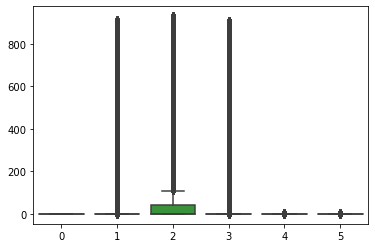

In [370]:
# Boxplot to visualize every sensor of data
import seaborn as sns

all_arr = [total_touch_np_array_flatten[:,0],
           total_touch_np_array_flatten[:,1],
           total_touch_np_array_flatten[:,2],
           total_touch_np_array_flatten[:,3],
           total_touch_np_array_flatten[:,4],
           total_touch_np_array_flatten[:,5]]
sns.boxplot(data=all_arr) #, showfliers=False

Q3:: 0    0.047312
Name: 0.75, dtype: float64 Q1:: 0    0.0
Name: 0.25, dtype: float64
upper_extreme: 0    0.11828
dtype: float64 lower_extreme: 0   -0.070968
dtype: float64


0.11701716205517598

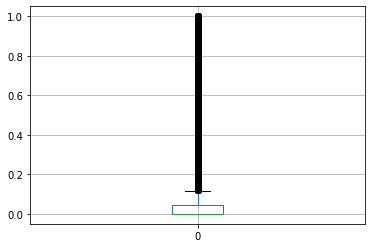

In [371]:
# from sklearn.preprocessing import scale, normalize, minmax_scale

# scale_C = scale(total_touch_np_array_flatten[:, 3])
# df = pd.DataFrame(scale_C)
# df.hist(bins=10)

from sklearn.preprocessing import scale, normalize, minmax_scale

scale_C = minmax_scale(total_touch_np_array_flatten[:, 2], feature_range=(0, 1)) # 2 is third sensor values
df = pd.DataFrame(scale_C) 
# df.hist(bins=10)
df.boxplot()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

print("Q3::", Q3, "Q1::", Q1)
IQR = Q3 - Q1
upper_extreme = Q3 + (1.5 * IQR)
lower_extreme = Q1 - (1.5 * IQR)
print("upper_extreme:",upper_extreme, "lower_extreme:", lower_extreme)
np.std(scale_C)


In [11]:
#%%time
# add in the hand-collected touch data for three touch types (experimenter generated data)
# dirs = 'Experiment/'
dirs = 'ExperimentSmall/'
touch_type = ['stroking', 'punching', 'holding'] #nana: ['stroking', 'punching', 'squeezing']
touch_len = 250
training_touch = []

for i in touch_type:
    temp_touch = []
    with open(dirs + i + '.txt', 'r') as f:
        
        for i, line in enumerate(f):
            
            temp_touch.append(line.split()) #Nana: temp_touch.append(line.split()[0].split(','))
#     print(shape(temp_touch))       
    for j in range(len(temp_touch)-touch_len): # here we have time window
        training_touch.append(temp_touch[j:j+touch_len]) 
        
training_touch = array(training_touch)  # holds the hand generated data
training_touch.shape  # c. 20,000 samples
# Training touch comes from shifting one time window of Synthetic touch data 
# ----
#  ----
#   ----
#    ----

(29250, 250, 6)

# creating the stage 1 auto-encoder model

In [12]:

    # elu is variant on relu (use instead of tanh), chosen because it treats negative weight values well
    # using relu caused some weights to hit zero (bad)
auto_input = layers.Input(shape=(250, 6)) #input shape
x = layers.Conv1D(64, 9, activation='elu', padding='same')(auto_input)  #feed input layer to next convolutional layer
x = layers.BatchNormalization()(x)  # normalization after activation function here
x = layers.Dropout(0.5)(x)          # deactivates half of parameters at random on each batch to avoid overfitting
x = layers.MaxPooling1D(5)(x)       # downsample with a window of 5
x = layers.Conv1D(128, 9, activation='elu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.MaxPooling1D(5)(x)

shape = K.int_shape(x)[1:]          # saves the shape for later upsampling
x = layers.Flatten()(x)
x = layers.Dense(256, activation='elu')(x)
embedded = x                        # saves the encoder in 'embedded' touch (a 256 member vector)

# define decoder as logical inverse of encoder
x = layers.Dense(prod(shape))(x)    # maps embedded layer output into shape
x = layers.Reshape(shape)(x)
x = layers.UpSampling1D(5)(x)
x = layers.Conv1D(128, 9, activation='elu', padding='same')(x)  
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.UpSampling1D(5)(x)
x = layers.Conv1D(64, 9, activation='elu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(6)(x)

auto_1 = Model(auto_input, x)  # entire model
auto_1.compile(optimizer='RMSprop', loss='mse')  # can use ADAM in place of RMSprop, 
# mean absolute error vs mse
auto_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 6)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 250, 64)           3520      
_________________________________________________________________
batch_normalization (BatchNo (None, 250, 64)           256       
_________________________________________________________________
dropout (Dropout)            (None, 250, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 128)           73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 128)           512   

In [13]:
# auto_1.get_weights()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(t, t, test_size=0.2)
X_train.shape, y_train.shape

((96, 250, 6), (96, 250, 6))

### validation_split is activated

In [14]:
auto_1 = load_model('test')

In [16]:
# auto_1.get_weights()

In [18]:
# train full autoencoder on synthetic data
history_synthetic = auto_1.fit(t, t, 
         epochs= 10, # epochs=5 bud nana
         batch_size=8,
         shuffle=True,
#          validation_split=0.2,
         );

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-07-26 17:56:27.159668: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-26 17:56:27.159886: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


15/15 [==============================] - 1s 14ms/step - loss: 4126.0259
Epoch 2/10
15/15 [==============================] - 0s 14ms/step - loss: 4027.2820
Epoch 3/10
15/15 [==============================] - 0s 14ms/step - loss: 3961.4272
Epoch 4/10
15/15 [==============================] - 0s 14ms/step - loss: 3892.3494
Epoch 5/10
15/15 [==============================] - 0s 14ms/step - loss: 3780.9106
Epoch 6/10
15/15 [==============================] - 0s 14ms/step - loss: 3700.4622
Epoch 7/10
15/15 [==============================] - 0s 14ms/step - loss: 3617.6340
Epoch 8/10
15/15 [==============================] - 0s 14ms/step - loss: 3609.8838
Epoch 9/10
15/15 [==============================] - 0s 14ms/step - loss: 3487.0078
Epoch 10/10
15/15 [==============================] - 0s 14ms/step - loss: 3448.2292


In [13]:
# train full autoencoder on synthetic data
history_synthetic = auto_1.fit(t, t, 
         epochs= 100, # epochs=5 bud nana
         batch_size=8,
         shuffle=True,
#          validation_split=0.2,
         );

Epoch 1/100
15/15 [==============================] - 0s 14ms/step - loss: 3524.1418
Epoch 2/100
15/15 [==============================] - 0s 14ms/step - loss: 3534.5242
Epoch 3/100
15/15 [==============================] - 0s 14ms/step - loss: 3389.1809
Epoch 4/100
15/15 [==============================] - 0s 14ms/step - loss: 3300.8289
Epoch 5/100
15/15 [==============================] - 0s 14ms/step - loss: 3276.0312
Epoch 6/100
15/15 [==============================] - 0s 14ms/step - loss: 3210.0730
Epoch 7/100
15/15 [==============================] - 0s 14ms/step - loss: 3107.8726
Epoch 8/100
15/15 [==============================] - 0s 14ms/step - loss: 3049.2542
Epoch 9/100
15/15 [==============================] - 0s 14ms/step - loss: 3008.3557
Epoch 10/100
15/15 [==============================] - 0s 14ms/step - loss: 2982.1418
Epoch 11/100
15/15 [==============================] - 0s 14ms/step - loss: 2884.0178
Epoch 12/100
15/15 [==============================] - 0s 15ms/step - loss:

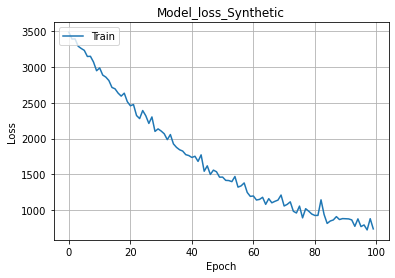

In [22]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history_synthetic.history['loss'])
# plt.plot(history_synthetic.history['val_loss'])
plt.title('Model_loss_Synthetic')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()


### Study the first stage model auto_1

In [20]:
y = auto_1.predict(t) # First run auto_1.evaluate(t) then run auto_1.predict(t) to avoid kernel dying 

In [189]:
print("t_shape is:", t.shape)
import logging
import tensorflow
tensorflow.autograph.set_verbosity(0)
logging.getLogger("tensorflow").setLevel(logging.ERROR)

auto_1.save('test')

t_shape is: (120, 250, 6)


In [15]:
print("t_shape is:", t.shape)
auto_1.save('test')

t_shape is: (120, 250, 6)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/Users/nana/miniforge3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
2021-07-26 16:53:31.702034: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/Users/nana/miniforge3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: test/assets


In [21]:
y = auto_1.predict(t)
# t[0:1,:,:].shape
# Flatten data based on columns which represnet the number of sensors
y_np_array = np.array(y) # .astype(np.float)

y_np_array_flatten = y_np_array.flatten().reshape(y_np_array.shape[0]*y_np_array.shape[1], y_np_array.shape[2])
y_np_array_flatten.shape

(30000, 6)

In [181]:
t_2d.shape

(30000, 6)

In [182]:
# t_2d 
first_sensor = t_2d[:,0]
count = 0
for i, item in enumerate(first_sensor):
    if item == 0.0:
        count += 1
print("All values:", len(first_sensor),", zero values:", count, ", Non-zero values:", len(first_sensor) - count, 
     ", Max is:", max(t_2d[:,0]),", Min is:", min(t_2d[:,0]))
    

All values: 30000 , zero values: 22213 , Non-zero values: 7787 , Max is: 249.0 , Min is: 0.0


In [22]:
first_sensor = y_np_array_flatten[:,0]
count = 0
for i, item in enumerate(first_sensor):
    if item == 0.0:
        count += 1
print("All values:", len(first_sensor),", zero values:", count, ", Non-zero values:", len(first_sensor) - count, 
     ", Max is:", max(y_np_array_flatten[:,0]),", Min is:", min(y_np_array_flatten[:,0]))
    

All values: 30000 , zero values: 0 , Non-zero values: 30000 , Max is: 36.31895 , Min is: -22.885782


In [26]:
second_sensor = y_np_array_flatten[:,1]
count = 0
for i, item in enumerate(second_sensor):
    if item == 0.0:
        count += 1
print("All values:", len(second_sensor),", zero values:", count, ", Non-zero values:", len(second_sensor) - count, 
     ", Max is:", max(y_np_array_flatten[:,1]),", Min is:", min(y_np_array_flatten[:,1]))
    

All values: 30000 , zero values: 0 , Non-zero values: 30000 , Max is: 4.0705686 , Min is: -1.3161293


In [27]:
third_sensor = y_np_array_flatten[:,2]
count = 0
for i, item in enumerate(third_sensor):
    if item == 0.0:
        count += 1
print("All values:", len(third_sensor),", zero values:", count, ", Non-zero values:", len(third_sensor) - count, 
     ", Max is:", max(y_np_array_flatten[:,2]),", Min is:", min(y_np_array_flatten[:,2]))
    

All values: 30000 , zero values: 0 , Non-zero values: 30000 , Max is: 26.031942 , Min is: -32.28317


In [28]:
fourth_sensor = y_np_array_flatten[:,3]
count = 0
for i, item in enumerate(fourth_sensor):
    if item == 0.0:
        count += 1
print("All values:", len(fourth_sensor),", zero values:", count, ", Non-zero values:", len(fourth_sensor) - count, 
     ", Max is:", max(y_np_array_flatten[:,3]),", Min is:", min(y_np_array_flatten[:,3]))
    

All values: 30000 , zero values: 0 , Non-zero values: 30000 , Max is: 27.785074 , Min is: -14.864829


In [29]:
fifth_sensor = y_np_array_flatten[:,4]
count = 0
for i, item in enumerate(fifth_sensor):
    if item == 0.0:
        count += 1
print("All values:", len(fifth_sensor),", zero values:", count, ", Non-zero values:", len(fifth_sensor) - count, 
     ", Max is:", max(y_np_array_flatten[:,4]),", Min is:", min(y_np_array_flatten[:,4]))
    

All values: 30000 , zero values: 0 , Non-zero values: 30000 , Max is: 30.887615 , Min is: -16.452091


In [30]:
sixth_sensor = y_np_array_flatten[:,5]
count = 0
for i, item in enumerate(sixth_sensor):
    if item == 0.0:
        count += 1
print("All values:", len(sixth_sensor),", zero values:", count, ", Non-zero values:", len(sixth_sensor) - count, 
     ", Max is:", max(y_np_array_flatten[:,5]),", Min is:", min(y_np_array_flatten[:,5]))
    

All values: 30000 , zero values: 0 , Non-zero values: 30000 , Max is: 44.478806 , Min is: -20.511765


In [65]:
# from keras.models import Model, load_model

embedded_model = load_model('stage_1_model.h5')  # loads weights in model
total_touch =  total_touch.astype(np.float64)

##### Try shuffle data befor feeding to the model
### First Stage Model which its output is (None, 256)

In [75]:
# from keras.models import Model, load_model

embedded_model = load_model('stage_1_model.h5')  # loads weights in model
total_touch =  total_touch.astype(np.float64)

In [77]:
embedding = embedded_model.predict(total_touch, verbose=1)  # runs encoder on all human collected data
print("embedding's shape is:", embedding.shape) 

3730/3730 [==============================] - 10s 3ms/step
embedding's shape is: (119337, 256)


### Second Stage Model which its Input is (None, 256) and Output is (None, 11)


In [69]:
# from keras.models import Model, load_model

embedded_model = load_model('stage_2_model.h5')  # loads weights in model
total_touch =  total_touch.astype(np.float64)
embedding_2 = embedded_model.predict(embedding, verbose=1)  # runs encoder on all human collected data
print(embedding_2.shape)

/var/folders/lb/_203ykj57y3dsvmmryg019nr0000gn/T/ipykernel_2066/4074395438.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  total_touch =  total_touch.astype(np.float)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3730/3730 [==============================] - 1s 276us/step
(119337, 11)


In [82]:
total_touch.shape

(119337, 250, 6)

In [81]:
embedding.shape, embedding_2.shape

((119337, 256), (119337, 11))

In [91]:
embedding_2[:,10].shape

(119337,)

In [333]:
type(embedding_2)

numpy.ndarray

In [96]:
# First column of affect-vector 
np.std(embedding_2[:,0]), np.mean(embedding_2[:,0])

(11.054587, 9.214968)

In [98]:
# Second column of affect-vector 
np.std(embedding_2[:,1]), np.mean(embedding_2[:,1])

(9.888124, 7.3806915)

In [101]:
# Eleventh column of affect-vector 
np.std(embedding_2[:,10]), np.mean(embedding_2[:,10])

(4.6771483, 1.2978473)

In [107]:
embedding_2[:,0].size

119337

# Normal Distribution

#### First Dimension of Affect vector: Supervised Signal VS Learned Model

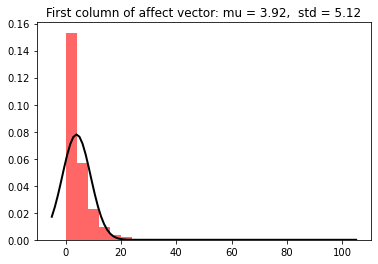

In [214]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Let's read our data from LIWC file
# Posemotion Anxiety Anger Sad Tentative Certain
data = liwc_csv.loc[:,"posemo"] # posemo	negemo	anx	anger	sad	female	male	tentat	certain	sexual	swear

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [362]:
embedding_2.shape

(119337, 11)

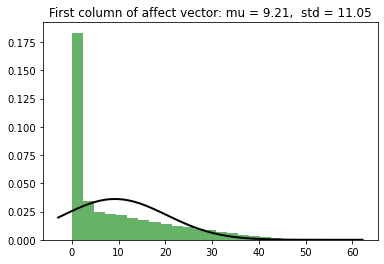

In [215]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Let's read our data
data = embedding_2[:,0]

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

#### Second Dimension of Affect vector: Supervised Signal VS Learned Model

In [360]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Let's read our data
# data = liwc_csv.loc[:,"negemo"] ## posemo	negemo	anx	anger	sad	female	male	tentat	certain	sexual	swear

# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

In [361]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Let's read our data
# data = embedding_2[:,1]

# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

#### Third Dimension of Affect vector: Supervised Signal VS Learned Model

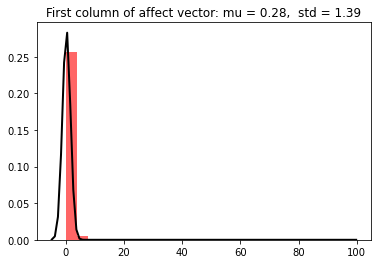

In [218]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Let's read our data
data = liwc_csv.loc[:,"anx"] ## posemo	negemo	anx	anger	sad	female	male	tentat	certain	sexual	swear

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

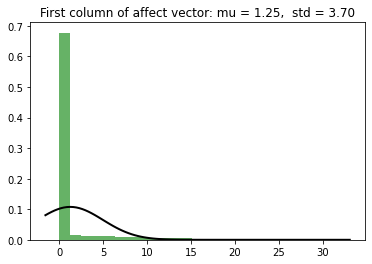

In [219]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Let's read our data
data = embedding_2[:,2]

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

#### Fourth Dimension of Affect vector: Supervised Signal VS Learned Model

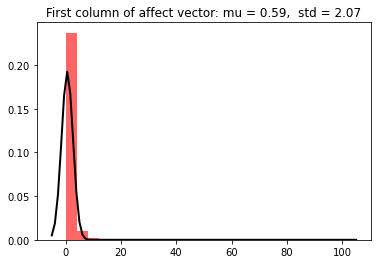

In [220]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Let's read our data
data = liwc_csv.loc[:,"anger"] ## posemo	negemo	anx	anger	sad	female	male	tentat	certain	sexual	swear

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

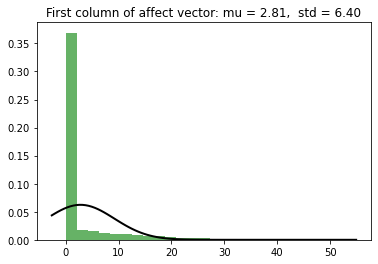

In [221]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Let's read our data
data = embedding_2[:,3]

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

#### Fifth Dimension of Affect vector: Supervised Signal VS Learned Model

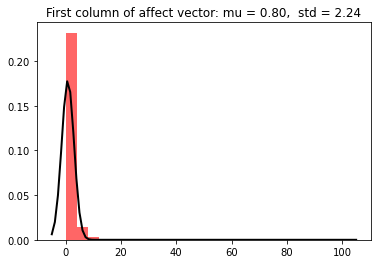

In [222]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Let's read our data
data = liwc_csv.loc[:,"sad"] ## posemo	negemo	anx	anger	sad	female	male	tentat	certain	sexual	swear

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

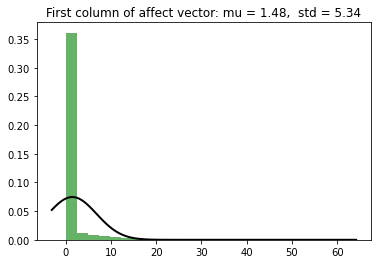

In [223]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Let's read our data
data = embedding_2[:,4]

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

#### Sixth Dimension of Affect vector: Supervised Signal VS Learned Model

In [352]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Let's read our data
# data = liwc_csv.loc[:,"female"] ## posemo	negemo	anx	anger	sad	female	male	tentat	certain	sexual	swear

# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

In [353]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Let's read our data
# data = embedding_2[:,5]

# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

#### Seventh Dimension of Affect vector: Supervised Signal VS Learned Model

In [354]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Let's read our data
# data = liwc_csv.loc[:,"male"] ## posemo	negemo	anx	anger	sad	female	male	tentat	certain	sexual	swear

# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

In [355]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Let's read our data
# data = embedding_2[:,6]

# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

#### Eighth Dimension of Affect vector: Supervised Signal VS Learned Model

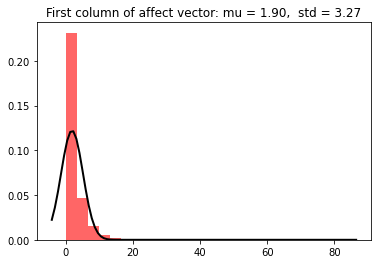

In [228]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Let's read our data
data = liwc_csv.loc[:,"tentat"] ## posemo	negemo	anx	anger	sad	female	male	tentat	certain	sexual	swear

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

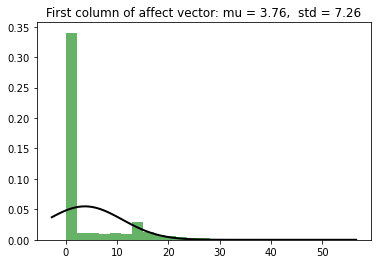

In [229]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Let's read our data
data = embedding_2[:,7]

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

#### Ninth Dimension of Affect vector: Supervised Signal VS Learned Model

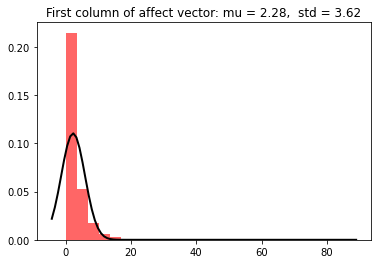

In [230]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Let's read our data
data = liwc_csv.loc[:,"certain"] ## posemo	negemo	anx	anger	sad	female	male	tentat	certain	sexual	swear

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

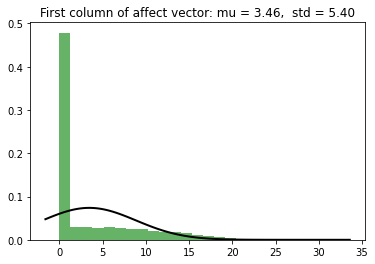

In [231]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Let's read our data
data = embedding_2[:,8]

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

#### Tenth Dimension of Affect vector: Supervised Signal VS Learned Model

In [356]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Let's read our data
# data = liwc_csv.loc[:,"sexual"] ## posemo	negemo	anx	anger	sad	female	male	tentat	certain	sexual	swear

# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

In [357]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Let's read our data
# data = embedding_2[:,9]

# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

#### Eleventh Dimension of Affect vector: Supervised Signal VS Learned Model

In [358]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Let's read our data
# data = liwc_csv.loc[:,"swear"] ## posemo	negemo	anx	anger	sad	female	male	tentat	certain	sexual	swear

# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

In [359]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt


# # Let's read our data
# data = embedding_2[:,10]

# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "First column of affect vector: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

In [237]:
# pip install textblob
https://medium.com/pythoneers/15-python-packages-you-probably-dont-know-exits-aef0525a965f
    

In [297]:
from textblob import TextBlob
import nltk
# https://medium.com/pythoneers/15-python-packages-you-probably-dont-know-exits-aef0525a965f

In [330]:
### Reviews
review1 = 'The Food Is awesome. I loved it. '
review2 = 'Worst Quality. Worst Taste. Worst experience. I hate it.'

In [331]:
## The polarity of the text lies from -1 to 1. means any - value will be negative any + value will be positive and 0 for netural

### Checking For Sentiment
print(TextBlob(review1).sentiment[0]) ## 0.44999999999999996 (A positive Number) Means Positive
print(TextBlob(review2).sentiment[0]) ## -0.95 (A negative Number) Means Negative


0.85
-0.95
